# Horoscope
- Data set from Kaggle, from a Research Paper.
- All numerical feature, no categorical features. Assume all features are independent, except for the response "Class".
- Features obtained from PCA (features are necessarily to be masked due to privacy problem).
- 284807 total transaction, 492 fraud.
- Very imbalanced, fraud ratio of 0.17%.
- Label: 0 is not fraud, 1 is fraud.
- No null entrance whatsoever. Data needs no further cleaning 
- Very few anomalies (in both transacion frequency and other anonymous features), Logistic Regression can be used as baseline method. 

## Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
barbie = "#e0218a"
ken = "#00cdff"

In [3]:
df = pd.read_csv('creditcard.csv')

## Basic information

In [4]:
# describe() is not meaningful/helpful here
# print("------------Basic descriptions:")
# print(df.describe())

allCount = len(df)
print("Number of transactions:")
print(allCount)

legit = df[df.Class==0]
legitCount = len(legit)
print("Number of legit transactions:")
print(legitCount)

fraud = df[df.Class==1]
fraudCount = len(fraud)
print("Number of fraud transactions:")
print(fraudCount)

print("Fraud percentage: ")
print((fraudCount/allCount)*100, "%")

print("Check for null value presence: ")
missing = df.isna().sum().max()
print(missing)
if (missing==0): 
    print("There is no null entrance. Data is cleaned.")

Number of transactions:
284807
Number of legit transactions:
284315
Number of fraud transactions:
492
Fraud percentage: 
0.1727485630620034 %
Check for null value presence: 
0
There is no null entrance. Data is cleaned.


## Checking imbalance

Text(0.5, 1.0, 'A pie chart to illustrate how imbalance the data is')

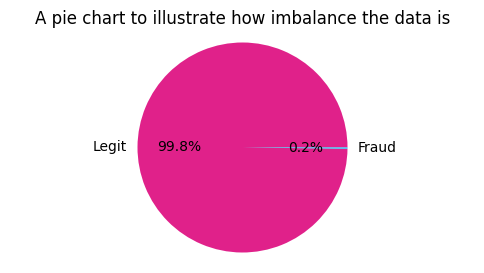

In [5]:
fig, ax0 = plt.subplots(1, 1, figsize=(6,3))
ax0.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Legit','Fraud'], colors=[barbie, ken])
plt.axis('equal')
plt.ylabel('')
plt.title("A pie chart to illustrate how imbalance the data is")

## Checking features correlation

<AxesSubplot: >

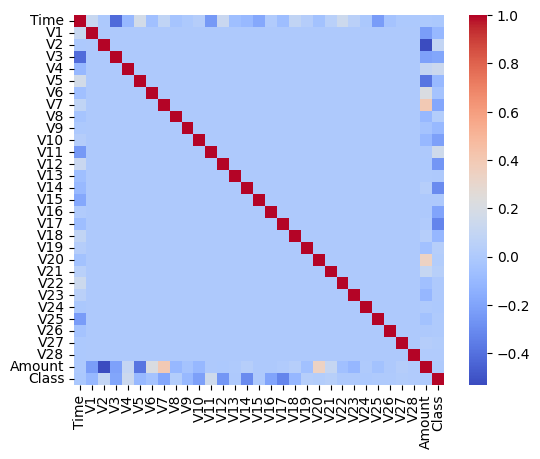

In [7]:
sns.heatmap(df.corr(), square=True, cmap='coolwarm', xticklabels=True, yticklabels=True)

### Comments 
- Features V1-V28 has correlation coefficients mostly 0. We can then assume that the 28 features are independent from each other.

# Anomalies
**Are there many anomalies in the data set? Would that make Logistic regression not suitable for this?**
- Nothing significant. The anomalies are seemingly due to the inherent variability of the data (or the nature of the matter). 
- We do not drop the anomalies because there hasn't been any reason to. 
- Logistic regression can be used as the baseline method.

In [8]:
df2 = df.copy()
df2["Hours"] = round(df['Time']/3600)

Text(0.5, 0, 'Number of transactions per hour')

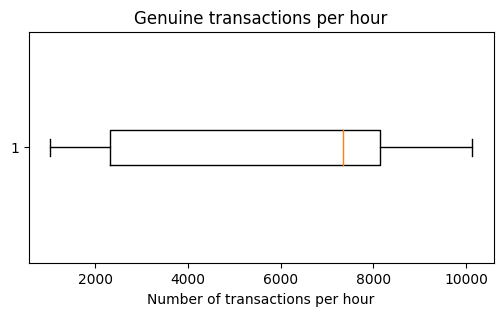

In [9]:
legit2 = df2[df2["Class"]==0].groupby("Hours").count()["Class"]
fig, ax1 = plt.subplots(1, 1, figsize=(6,3))
ax1.boxplot(legit2, vert=False)
ax1.set_title("Genuine transactions per hour")
ax1.set_xlabel('Number of transactions per hour')

Text(0.5, 0, 'Number of transactions per hour')

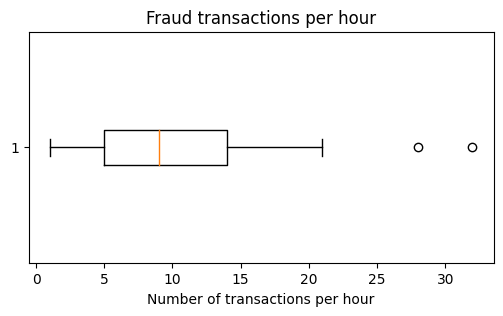

In [11]:
fraud2 = df2[df2["Class"]==1].groupby("Hours").count()["Class"]
fig, ax2 = plt.subplots(1, 1, figsize=(6,3))
ax2.boxplot(fraud2, vert=False)
ax2.set_title("Fraud transactions per hour")
ax2.set_xlabel('Number of transactions per hour')

In [12]:
print("The 2 abnormally high values: ")
print(fraud2.nlargest(2))

The 2 abnormally high values: 
Hours
26.0    32
11.0    28
Name: Class, dtype: int64


### Comment
- There are not a lot of anomalies, only 2 are present in the fraud data set. There are 2 anomalies (11th hour has 28 transactions, 26th hour has 32 transactions), but still not a very big deal. 
- Seems like we can use Logistic Regression as baseline method to compare other methods to.

# Feature engineering
- We don't have to do this because the data is masked, so we don't know what the features are to engineer. 
- Bruteforce feature engineering (come up with as many features as possible, then try and pick the best) isn't a very compelling idea. 

# Feature selection

## Correlation: Fraud/Valid vs. Time
**Is there a time that fraud transactions are more likely to happen?**
- Time doesn't seem to be a factor indicative of fraudulent transactions. 
- Fraud frequency looks random and no weird pattern.
- Legit pattern is normal and as expected (fewer transactions in late night/early morning time, more transactions during awake hours).

**Suggestion**: drop Time feature.

Text(0.5, 0, 'Hours')

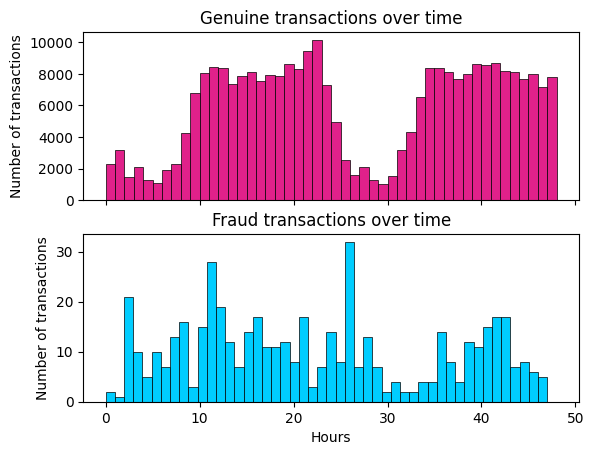

In [15]:
fig, (ax3, ax4) = plt.subplots(2, 1, sharex=True)

ax3.hist(df2.Hours[df2["Class"]==0], bins=48, color=barbie, edgecolor='black', linewidth=0.5)
ax3.set_title("Genuine transactions over time")
ax3.set_ylabel('Number of transactions')

ax4.hist(df2.Hours[df2["Class"]==1], bins=48, color=ken, edgecolor='black', linewidth=0.5)
ax4.set_title("Fraud transactions over time")
ax4.set_ylabel('Number of transactions')
ax4.set_xlabel('Hours')

### Comments 
- Over the span of 2 days, most real transactions happens when people are awake. fewer transactions happen when most people are asleep. As this data is likely from a small region in Europe, this makes sense. 
- We notice nothing sus in the real transaction subset.
---------
- The frequency of fraud transactions are pretty random. 
- Fraud transactions are more spread out than legit transactions. This can be attributed to the fact that the number of fraud transactions are very few when compared to the number of legit transactions, so the fraud ones doesn't have a pattern as clear as that of the real transactions.
- Nothing seems alarming.
---------
- Cool insight: Thievery knows no hour. Crimminals don't just work 9-5, they are on the job 24/7 and when they attack is a big surprise that constitute the beauty of life. 

## Correlation: Fraud/Valid v. Amount
**Are fraud transactions have higher amounts than genuine transactions?** 

Yes, after conducting hypothesis testing. 

**Suggestion**: Not dropping the Amount feature. 

In [29]:
len(df2[df2.Amount<=30])


161080

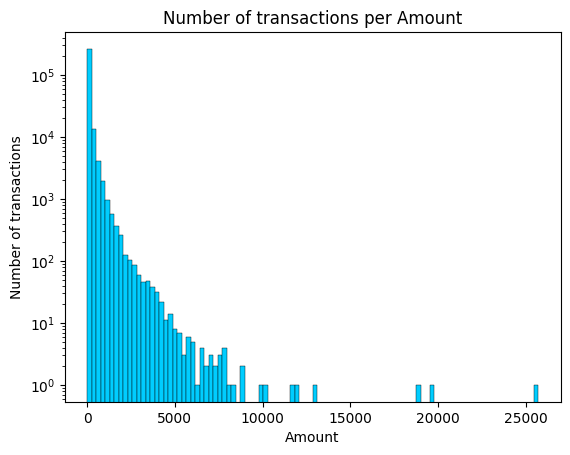

In [31]:
fig, ax00 = plt.subplots(1, 1)
ax00.hist(df2['Amount'], bins=100, color=ken, edgecolor='black', linewidth=0.3)
ax00.set_title('Number of transactions per Amount')
ax00.set_ylabel('Number of transactions')
ax00.set_xlabel('Amount')
ax00.set_yscale('log') # to see tail

Text(0.5, 0, 'lnAmount')

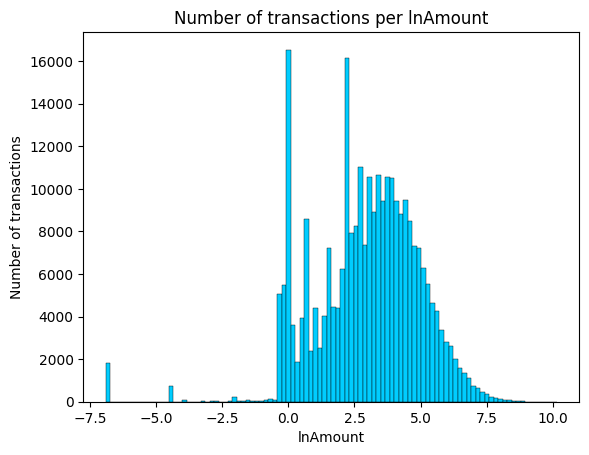

In [23]:
df2['lnAmount'] = np.log(df2['Amount']+0.001)

fig, axx = plt.subplots(1, 1)
axx.hist(df2['lnAmount'], bins=100, color=ken, edgecolor='black', linewidth=0.3)
axx.set_title('Number of transactions per lnAmount')
axx.set_ylabel('Number of transactions')
axx.set_xlabel('lnAmount')


### Graphical analysis
Looking at graphs, the answer seems to be no, because the highest amount of a Fraud transaction is slightly over $2000, while the range of amount in Genuine transactions goes all the way to >$25000. 


Text(0, 0.5, 'Number of transactions')

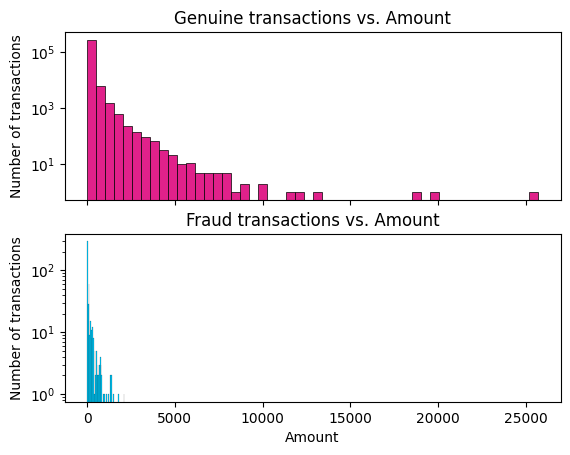

In [24]:
fig, (ax5, ax6) = plt.subplots(2, 1, sharex=True)

ax5.hist(df2.Amount[df2.Class==0], bins=50, color=barbie, edgecolor='black', linewidth=0.5)
ax5.set_yscale('log') # to see tail
ax5.set_title('Genuine transactions vs. Amount')
# ax5.set_xlabel('Amount')
ax5.set_ylabel('Number of transactions')

ax6.hist(df2.Amount[df2.Class==1], bins=50, color=ken, edgecolor='black', linewidth=0.1)
ax6.set_yscale('log') # to see tail
ax6.set_title('Fraud transactions vs. Amount')
ax6.set_xlabel('Amount')
ax6.set_ylabel('Number of transactions')

Text(0.5, 0, 'Amount')

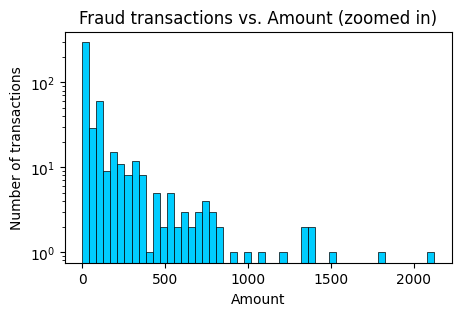

In [25]:
fig, ax7 = plt.subplots(1, 1, figsize=(5,3))
ax7.hist(df2.Amount[df2.Class==1], bins=50, color=ken, edgecolor='black', linewidth=0.5)
ax7.set_yscale('log') # to see the tail 
ax7.set_title('Fraud transactions vs. Amount (zoomed in)')
ax7.set_ylabel('Number of transactions')
ax7.set_xlabel('Amount')

### Comments 
- Fraud transactions of highest values are just a bit above $2000.
- If we only look at the graph, the answer to the question is no, fraud transactions do not have higher value/amount than genuine transactions. 
- The most frequent amount for genuine transactions is $0, for which there may be several explanations: (1) when a person make a transaction and that transaction fails (i.e. due to insufficient balance or no internet connection), the transaction is recorded as of $0; (2) the Zero Authentication used to verify cards on shopping platforms. 
- There has been no speculated explanation as to why $0 is the most popular fraud transaction amount. 

### Hypothesis testing
We treat the Genuine transaction class as the population and the Fraud transaction class as the sample. The perform Z-test on the hypothesis: 

$H_0$: Fraud transactions have value lower than or equal to genuine transactions. 

$H_a$: Fraud transactions have value higher than genuine transactions. 

We perform 1-tail Z-test at 99% significance level. If the z-score we get is >=2.3, then we can reject $H_0$. 

In [19]:
from cmath import sqrt

population = df[df.Class==0].Amount
sample = df[df.Class==1].Amount 

stdError = population.std() / sqrt(sample.size)
z = (sample.mean() - population.mean()) / stdError

print("Z-score is ", z)
if (z >= 2.4): 
    print("Reject HO.")
else: 
    print("Fail to reject H0.")

Z-score is  (3.0082898982097133+0j)
Reject HO.


### Comments
- We have rejected the null hypothesis and now adopt the hypothesis that Fraud transactions have higher value than Genuine transactions. 

## Hypothesis testing on individual features
For each feature, we treat the Genuine class as the population and the Fraud class as the sample. The we perform Z-test on the hypothesis: 

$H_0$: Feature X is insignificant (as individual). 

$H_a$: Feature X is significant (as individual).

Since the hypothesis are non-directional, the Z-test will be 2-tailed at 99% significant level ___. 

In [22]:
# this part is incomplete as I was questioning whether I should do this :) 
# individual hypothesis testing does not indicate that a variable is not influential on the response 
# as it fails to capture the interaction between variables

# maybe I will do this AND an F-test to see if we can eliminate any features

# Suggestions 
Things I want to try and use on this data set: 
- Naive Bayesian Classification (make sure to balance the data very well).
- Cost-Sensitive learning for Imbalanced data: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/ ,because the cost of a False Negative (probably) is going to be more than a False Negative. 
- Since the data is very imbalanced, the criteria to judge the model's performance is Area Under the Precision-Call Curve (AUPRC). The 2 most important criteria are Precision (TP/(TP+FP)) and Recall (TP/(TP+FN)).
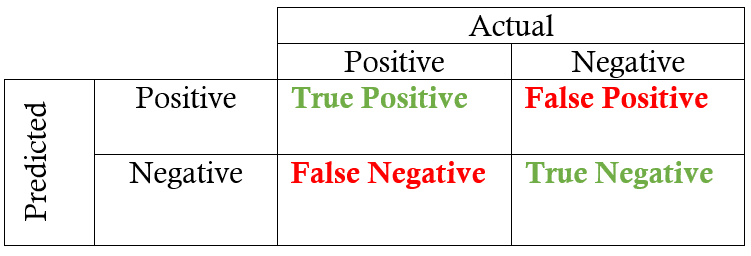
